<a href="https://colab.research.google.com/github/mmmyr/Human-Voice-Audio-Classification/blob/main/%E2%80%9CCNN_last_run_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
import re
import seaborn as sns
import random
from sklearn import svm
import librosa
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import re
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
import pywt
from scipy import signal


import keras
from keras.layers import Conv1D, Embedding, Dropout, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, nadam
from keras import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# test data and test data directory

data_dir = "/content/drive/MyDrive/ELEC378_FinalProject/data/data"

test_dir = "/content/drive/MyDrive/ELEC378_FinalProject/test/test"



Mounted at /content/drive


In [ ]:
#SVM


In [ ]:
def FeatureExtraction (dir, split=True):

  '''
  Function for feature extraction. Change this section to change what features we are using.

  input: a directory of the data. Will split to test and train, a boolean: if split is true, will extract features and labels and store them in 4 arrays:
  train_data, train_label, test_data, test_label. if split is false, function will extract all data provided in the directory and output 2 arrays with values 2 arrays that are empty.
  Use labeled data and split = false will give you  (train_data, train_label); use unlabled data and split = false will give you (test_data, test_label).

  output: data matrix and lables for both test and train.

  '''
  audio_files = [f for f in os.listdir(dir) if f.endswith(".wav")]

  train_files, test_files = train_test_split(audio_files, test_size=0.2)

  train_wt = []
  train_mfccs = []
  train_label= []

  test_mfccs = []
  test_wt  = []
  test_label = []


  for file_name in audio_files:

      # Load audio
      file_path = os.path.join(dir, file_name)
      raw_audio, sr = librosa.load(file_path)

      #if audio is too short, append zeros after it.
      #noise = np.random.normal(loc=0, scale=0.3)

      if np.shape(raw_audio)[0] < 80000:
          padded_audio = np.pad(raw_audio, [(0, 80000 - np.shape(raw_audio)[0])], mode='constant')
      else:
          padded_audio = raw_audio

      # now slice so that we guarantee that each array has the same length
      audio = padded_audio[20000:80000]

      # feature extraction
      mfccs  = librosa.feature.mfcc(y = audio, sr = 22050, n_mfcc = 28)
      #delta_mfccs = librosa.feature.delta(y = mfccs)
      spec_centroid = librosa.feature.spectral_centroid(y = audio)

      coeffs = pywt.wavedec(audio, 'db1', level =4)

      mfccs_wt = []


      for i in coeffs:
          mfccsw = librosa.feature.mfcc(y=i, sr=22050, n_mfcc=18)
          # pad the MFCCs to max_len

          mfccs_wt.append(mfccsw)

      #mfccs_wt = np.array(mfccs_wt)
      mfccs_wt = np.hstack(mfccs_wt)



      #spec_centroid = librosa.feature.spectral_centroid(y = audio)

      #spec_contrast = librosa.feature.spectral_contrast (y = audio)

      #morl = morl_wavelet_pca(audio)

      # Concatenate

      wavelet_features = mfccs_wt
      mfccs_features = np.concatenate([mfccs, spec_centroid])
      #features = morl

      label_map = {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}
      label = file_name.split(".")[0]

      #unlabeled data
      if label[:-3] == "sample":
        test_wt.append(wavelet_features)
        test_mfccs.append(mfccs_features)
        test_label.append(label)

      #labeled data
      else:
        if split:
          if file_name in train_files:
            train_wt.append(wavelet_features)
            train_mfccs.append(mfccs_features)
            label = re.sub('[^a-z]', "", label)
            train_label.append(label_map[label])

          elif file_name in test_files:
            test_wt.append(wavelet_features)
            test_mfccs.append(mfccs_features)
            label = re.sub('[^a-z]', "", label)
            test_label.append(label_map[label])

        elif not split:

          train_wt.append(wavelet_features)
          train_mfccs.append(mfccs_features)
          label = re.sub('[^a-z]', "", label)
          train_label.append(label_map[label])


  train_wt = np.array(train_wt)
  train_mfccs = np.array(train_mfccs)
  train_label = np.array(train_label)


  test_mfccs = np.array(test_mfccs)
  test_wt    = np.array(test_wt)
  test_label = np.array(test_label)

  #print("feature size is:", np.shape(features))
  #print("spec centroid:", np.shape(spec_centroid))
  return train_mfccs, train_wt, train_label, test_mfccs, test_wt, test_label

SVM

In [ ]:
#SVM implementation
import sklearn
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sk

clf=make_pipeline(StandardScaler(),SVC(gamma='scale',kernel="linear"))
clf.fit(X_train, y_train)
predictions_svm = clf.predict(X_test)

In [ ]:
X_train_mfccs, X_train_wt, y_train, X_test_mfccs, X_test_wt, y_test = FeatureExtraction(data_dir, split = True)

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

print(X_train_mfccs.shape)

(900, 29, 118)


(900, 18, 120)


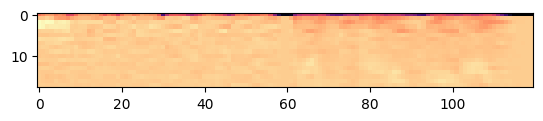

In [ ]:
print(X_train_wt.shape)
plt.imshow(X_train_wt[1], cmap = "magma")

In [ ]:
def two_branch(mfcc_input_shape, dwt_input_shape, num_classes):

    # Define the input layers for each feature set
    mfcc_input = Input(shape=mfcc_input_shape, name='mfcc_input')
    dwt_input = Input(shape=dwt_input_shape, name='dwt_input')

    # Define the convolutional layers for each feature set
    mfcc_conv1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(mfcc_input)
    mfcc_batch1 = BatchNormalization()(mfcc_conv1)
    mfcc_pool1 = MaxPooling2D(pool_size=(2, 2))(mfcc_batch1)
    mfcc_conv2 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(mfcc_pool1)
    mfcc_batch2 = BatchNormalization()(mfcc_conv2)
    mfcc_conv3 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(mfcc_batch2)
    mfcc_batch3 = BatchNormalization()(mfcc_conv3)
    mfcc_pool3 = MaxPooling2D(pool_size=(2, 2))(mfcc_batch3)
    mfcc_flat = Flatten()(mfcc_pool3)

    dwt_conv1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(dwt_input)
    dwt_batch1 = BatchNormalization()(dwt_conv1)
    dwt_pool1 = MaxPooling2D(pool_size=(2, 2))(dwt_batch1)
    dwt_conv2 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(dwt_pool1)
    dwt_batch2 = BatchNormalization()(dwt_conv2)
    dwt_pool3 = MaxPooling2D(pool_size=(2, 2))(dwt_batch2)
    dwt_flat = Flatten()(dwt_pool3)

    # Merge the feature sets by concatenating the flattened feature vectors
    merged = concatenate([mfcc_flat, dwt_flat])

    # Define the dense layers for classification

    dense1 = Dense(units=1024, activation='relu')(merged)
    dropout1 = Dropout(0.5)(dense1) # add dropout with rate of 0.5
    dense2 = Dense(units=num_classes, activation='softmax')(dropout1)
    # Define the model with two inputs and one output
    model = Model(inputs=[mfcc_input, dwt_input], outputs=dense2)

    return model

In [ ]:
#simple grid search to find best model parameters
def grid_search(model, learning_rates, batch_sizes):
    """
    Perform grid search hyper-parameter tuning
    """
    best_acc = float('-inf')
    best_batch = None
    best_lr = None
    empty_model_weights = model.get_weights()
    #iterate through param space

    for lr in learning_rates:
        for batch in batch_sizes:

            #build model with params
            model_results, _ = build_model(model, lr, batch, x_train, y_train, train_small=True)
            #store the accuracy results as dict mapping params -> model history
            val_acc = model_results.history['val_accuracy'][-1]
            train_acc = model_results.history['accuracy'][-1]
            if val_acc + train_acc > best_acc:
                best_batch = batch
                best_lr = lr
                best_acc = val_acc + train_acc

            #reset model weights for new run
            model.set_weights(empty_model_weights)

    return best_batch, best_lr


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=17, verbose=1)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1, initial_value_threshold=0.75)

model = two_branch((X_train_mfccs.shape[1], X_train_mfccs.shape[2], 1), (X_train_wt.shape[1], X_train_wt.shape[2], 1), 8)

model.compile(loss='categorical_crossentropy', optimizer="SGD",  metrics=['accuracy'])

# Train the model with the two input feature sets and corresponding labels
history = model.fit( [X_train_mfccs, X_train_wt], y_train_ohe, validation_data=([X_test_mfccs, X_test_wt], y_test_ohe), epochs=60, batch_size=32, callbacks=[checkpoint])


Epoch 1/60
29/29 [==============================] - ETA: 0s - loss: 7.5555 - accuracy: 0.2356
Epoch 1: val_accuracy did not improve from 0.75000
29/29 [==============================] - 3s 40ms/step - loss: 7.5555 - accuracy: 0.2356 - val_loss: 2.0910 - val_accuracy: 0.1644
Epoch 2/60
28/29 [===========================>..] - ETA: 0s - loss: 1.7687 - accuracy: 0.3504
Epoch 2: val_accuracy did not improve from 0.75000
29/29 [==============================] - 1s 24ms/step - loss: 1.7691 - accuracy: 0.3500 - val_loss: 1.9285 - val_accuracy: 0.2267
Epoch 3/60
28/29 [===========================>..] - ETA: 0s - loss: 1.5939 - accuracy: 0.3984
Epoch 3: val_accuracy did not improve from 0.75000
29/29 [==============================] - 1s 24ms/step - loss: 1.5928 - accuracy: 0.3989 - val_loss: 2.0062 - val_accuracy: 0.2533
Epoch 4/60
28/29 [===========================>..] - ETA: 0s - loss: 1.5644 - accuracy: 0.4342
Epoch 4: val_accuracy did not improve from 0.75000
29/29 [=======================

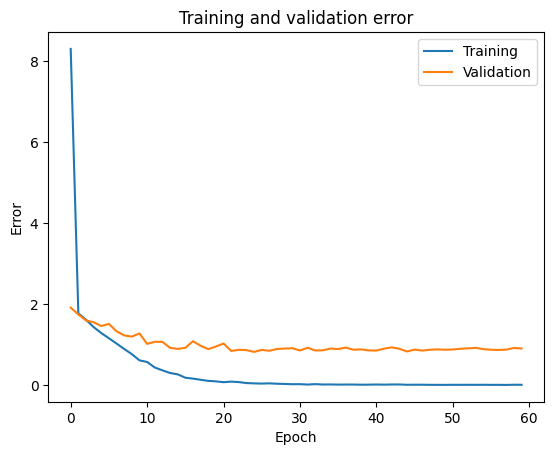

In [ ]:
# plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
print(X_train_mfccs.shape[1], X_train_mfccs.shape[2], 1)
print(X_train_wt.shape[1], X_train_wt.shape[2], 1)
print(y_test)

29 118 1
18 120 1
['sample014' 'sample024' 'sample015' 'sample012' 'sample018' 'sample029'
 'sample003' 'sample004' 'sample000' 'sample013' 'sample017' 'sample006'
 'sample007' 'sample025' 'sample020' 'sample010' 'sample030' 'sample009'
 'sample022' 'sample008' 'sample021' 'sample019' 'sample002' 'sample026'
 'sample016' 'sample027' 'sample028' 'sample001' 'sample011' 'sample023'
 'sample005' 'sample096' 'sample051' 'sample068' 'sample061' 'sample050'
 'sample074' 'sample046' 'sample065' 'sample052' 'sample069' 'sample084'
 'sample053' 'sample081' 'sample082' 'sample080' 'sample040' 'sample101'
 'sample056' 'sample067' 'sample038' 'sample097' 'sample063' 'sample088'
 'sample100' 'sample077' 'sample059' 'sample060' 'sample045' 'sample090'
 'sample044' 'sample057' 'sample066' 'sample093' 'sample031' 'sample072'
 'sample047' 'sample043' 'sample099' 'sample098' 'sample086' 'sample048'
 'sample049' 'sample083' 'sample058' 'sample062' 'sample071' 'sample035'
 'sample079' 'sample089' 'sample0

In [ ]:
dummy1, dummy2, dummy3, X_test_mfccs, X_test_wt, y_test = FeatureExtraction(test_dir, split = False)


In [ ]:
model.load_weights('best_model.h5')
y_predicted = model.predict([X_test_mfccs, X_test_wt])

y_predicted_ohv = np.argmax(y_predicted, axis = 1)

print(y_predicted_ohv)
label_map = {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}

def dict_search(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key

y_predicted_label = []
for i in y_predicted_ohv:
    val = dict_search(label_map, i)
    y_predicted_label.append(val)


print(y_predicted_label)

10/10 [==============================] - 1s 38ms/step
[1 3 6 1 6 4 5 0 4 2 3 1 2 2 2 1 2 2 6 2 7 5 0 6 0 3 1 5 7 0 5 5 6 1 0 0 3
 3 4 0 3 2 1 2 2 1 6 2 2 1 1 2 2 0 1 1 0 5 2 0 7 3 2 3 4 4 2 0 6 0 3 2 7 7
 1 7 7 2 3 6 5 2 4 7 3 4 6 2 0 6 4 7 2 3 1 7 2 5 1 3 2 1 2 3 7 7 5 1 3 4 6
 1 3 6 4 7 3 3 3 0 2 0 7 7 7 3 6 3 7 1 4 4 7 7 0 7 4 3 4 6 2 1 0 2 1 7 4 5
 7 4 5 7 2 0 3 1 3 4 7 3 5 4 1 7 1 1 1 7 2 2 3 5 3 0 4 0 7 7 5 1 2 0 7 1 2
 5 6 7 2 0 4 1 0 6 0 3 3 0 4 2 7 5 4 0 2 1 7 6 7 1 1 6 3 1 4 5 0 6 3 4 3 3
 4 3 6 1 1 2 6 4 6 3 4 6 3 6 0 1 2 1 7 3 4 1 7 1 3 4 0 3 7 2 4 2 7 0 7 4 3
 6 6 4 4 1 7 0 2 6 0 7 0 3 2 3 6 2 7 7 1 4 4 1 4 4 1 2 0 7 4 4 6 2 5 7 0 7
 1 7 1 1 5 7 1 2 0 0 4 2 7 0 1 3 0 1 0]
['calm', 'fearful', 'sad', 'calm', 'sad', 'happy', 'neutral', 'angry', 'happy', 'disgust', 'fearful', 'calm', 'disgust', 'disgust', 'disgust', 'calm', 'disgust', 'disgust', 'sad', 'disgust', 'surprised', 'neutral', 'angry', 'sad', 'angry', 'fearful', 'calm', 'neutral', 'surprised', 'angry', 'neutral', 'ne

In [ ]:
import csv

def make_csv(unlabeled_file_name, y_predicted_label):
  with open('prediction.csv', mode='w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['filename', 'label'])
      for i in range(len(unlabeled_file_name)):
        writer.writerow([unlabeled_file_name[i], y_predicted_label[i]])
  file.close()

make_csv(y_test, y_predicted_label)